In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [68]:
BHP = pd.read_csv('../Documents/Boston.csv')
BHP.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [69]:
X = BHP.iloc[:, :-1]
y = BHP.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Correlation matrix of Boston Housing dataset')

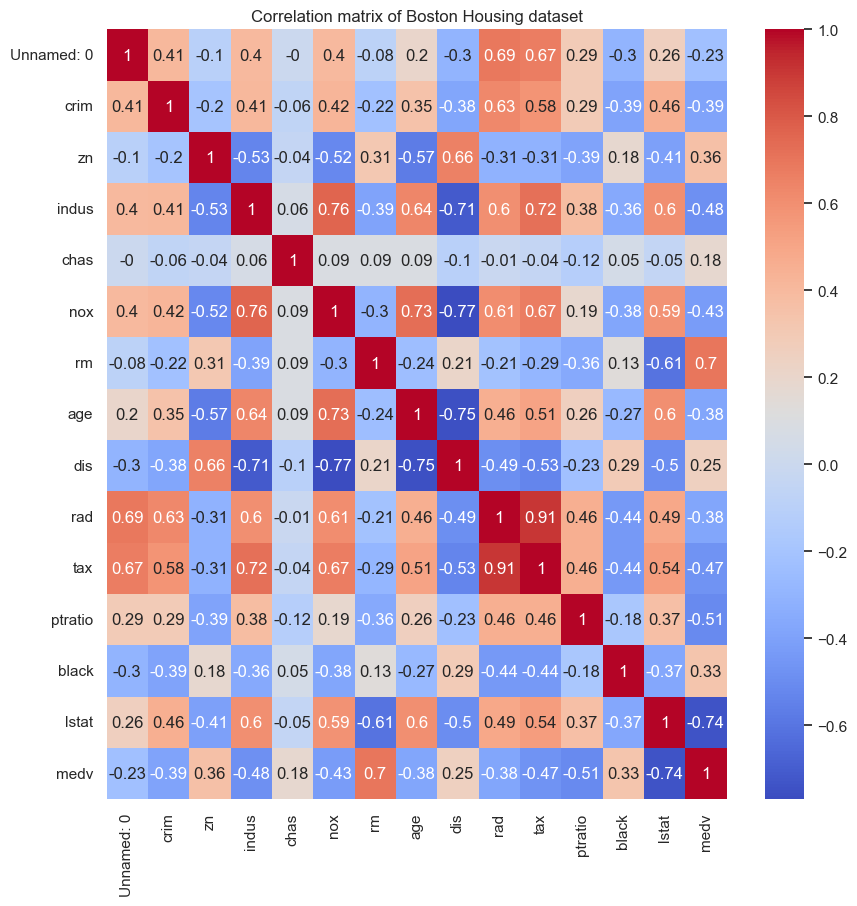

In [70]:
corr_matrix = BHP.corr().round(2)
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation matrix of Boston Housing dataset')

### Linear Regression

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse) 
print('mean squared error:', lr_mse)
print('Root mean squared error:', lr_rmse)
lr_mae = mean_absolute_error(y_test, y_pred)
print('MAE for linear regression model:', lr_mae)

mean squared error: 24.497819777630067
Root mean squared error: 4.9495272276885265
MAE for linear regression model: 3.2007547573407726


Text(0.5, 1.0, 'Predicted vs Actual values')

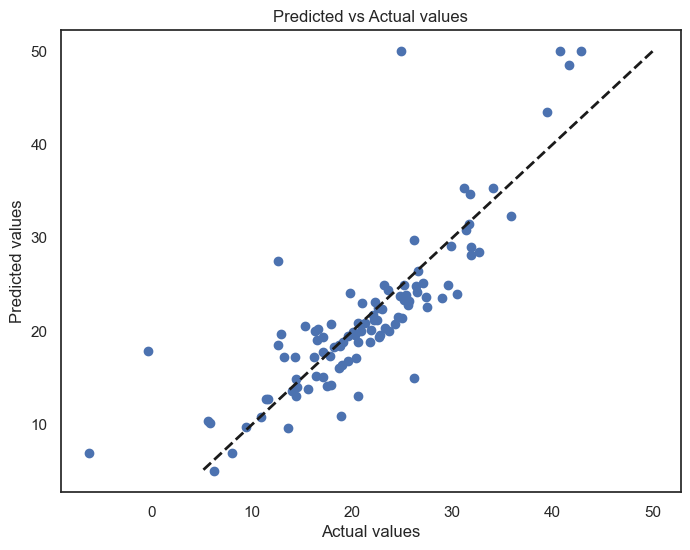

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_pred, y_test)
ax.plot([y.max(), y.min()], [y.max(), y.min()], 'k--', lw=2)
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Predicted vs Actual values')

### Random Forest


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred = model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print('mean squared error:', rf_mse)
print('Root mean squared error:', rf_rmse)
print('MAE for random forest regression model:', rf_mae)

mean squared error: 8.360242284313724
Root mean squared error: 2.8914083565476747
MAE for random forest regression model: 2.0226372549019604


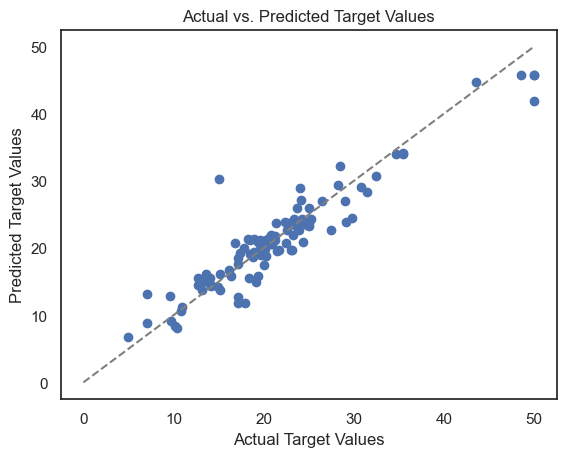

In [76]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--', color='gray')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Target Values'.format(rf_mae, rf_rmse))
plt.show()

### Principle Component Analysis 

In [77]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
pca = PCA(n_components=8, random_state=42)
X_train_pca = pca.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)

In [78]:
pca_mse = mean_squared_error(y_test, y_pred)
pca_rmse = np.sqrt(pca_mse)
print('mean squared error:', pca_mse)
print('Root mean squared error:', pca_rmse)
pca_mae = mean_absolute_error(y_test, y_pred)
print('mean absolute error:', pca_mae)

mean squared error: 32.26297295222527
Root mean squared error: 5.680050435711401
mean absolute error: 3.983787517850878


In [79]:
pca = PCA(n_components=13, random_state=42)
X_train_pca = pca.fit_transform(X_train)

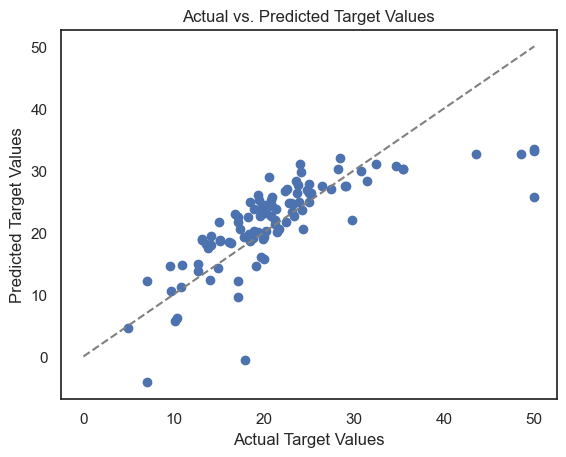

In [80]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--', color='gray')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Target Values'.format(pca_mae, pca_rmse))
plt.show()